## 1. load_digits( ) 데이터 분석

### 필요한 모듈 임포트

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## 데이터 준비

In [2]:
digits = load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

- Feature Data 지정
- Label Data 지정
- Target Names 출력
- 데이터 Describe

In [4]:
#각 행이 하나의 그림을 의미하는 데이터이므로 DataFrame으로 변환할 필요 없이 ndarray로 다룸
X = digits.data
y = digits.target

In [5]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [6]:
print(digits.DESCR)
#출력결과 instance개수가 5620개로 나오나 실제로 load_digits()로 제공되는 데이터는 1797개임

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## 학습용 데이터 분리

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

## 다양한 모델로 학습하기

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [9]:
decision_tree = DecisionTreeClassifier(random_state = 2)
random_forest = RandomForestClassifier(random_state = 2)
svc = SVC(random_state = 2)
sgd = SGDClassifier(random_state = 2)
lreg = LogisticRegression(random_state = 2)

## Label의 분포를 살펴봄으로써  Unbalancedness 판단하기

In [10]:
import seaborn as sns

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

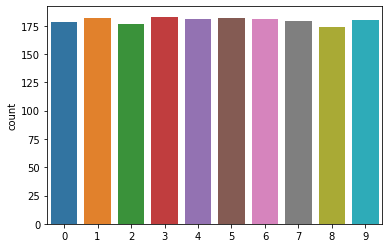

In [11]:
sns.countplot(y)

- 소결론: y의 분포는 Uniform 하므로 accuracy로 판단가능

- 모든 모델에 동일한 작업이 적용되므로 함수를 통해 코드를 재사용하자.

In [12]:
def learnAndEve(*args):
    for model in args:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f'{type(model)}를 이용한 결과')
        print(classification_report(y_test, y_pred))
        print(accuracy_score(y_test, y_pred))
        print('-----------------------------------')

In [13]:
model_list = [decision_tree, random_forest,svc,sgd,lreg]
learnAndEve(*model_list)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>를 이용한 결과
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        32
           1       0.86      0.86      0.86        44
           2       0.83      0.94      0.88        31
           3       0.67      0.67      0.67        36
           4       0.90      0.74      0.81        35
           5       0.97      0.86      0.91        43
           6       0.97      0.91      0.94        35
           7       0.82      0.82      0.82        40
           8       0.78      0.81      0.79        36
           9       0.66      0.82      0.73        28

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.83       360
weighted avg       0.84      0.84      0.84       360

0.8361111111111111
-----------------------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>를 이용한 결과
              precision    recall  f1-score   support

  

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 결론

- 라벨y의 분포가 균등하므로 precision이나 recall값 보다 accuracy를 사용할 수 있었음
- accuracy_score결과 SVC모델이 98%로 가장 높은 정확도를, Decision_tree모델이 84%로 가장 낮은 정확도를 보였음
- 따라서 SVC 모델을 채택하기로 함

## 2. load_wine( ) 데이터 분석

### 필요한 모듈 임포트

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

## 데이터 준비

In [2]:
wine = load_wine()

In [3]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

- Feature Data 지정
- Label Data 지정
- Target Names 출력
- 데이터 Describe

In [4]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
#모든 열이 numeric 이므로 ndarray로 다룸
X = wine.data
y = wine.target

In [6]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [7]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## 학습용 데이터 분리

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

## 다양한 모델로 학습하기

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [10]:
decision_tree = DecisionTreeClassifier(random_state = 2)
random_forest = RandomForestClassifier(random_state = 2)
svc = SVC(random_state = 2)
sgd = SGDClassifier(random_state = 2)
lreg = LogisticRegression(random_state = 2)

## Label의 분포를 살펴봄으로써  Unbalancedness 판단하기

In [11]:
import seaborn as sns

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

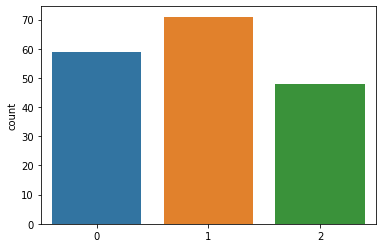

In [12]:
sns.countplot(y)

In [30]:
# a = np.array([[1],[2],[3]])
# b = np.array([[2, 3],[3, 4],[4, 5]])
# np.hstack((a,b))


array([[  14.23,    1.71,    2.43, ...,    3.92, 1065.  ,    0.  ],
       [  13.2 ,    1.78,    2.14, ...,    3.4 , 1050.  ,    0.  ],
       [  13.16,    2.36,    2.67, ...,    3.17, 1185.  ,    0.  ],
       ...,
       [  13.27,    4.28,    2.26, ...,    1.56,  835.  ,    2.  ],
       [  13.17,    2.59,    2.37, ...,    1.62,  840.  ,    2.  ],
       [  14.13,    4.1 ,    2.74, ...,    1.6 ,  560.  ,    2.  ]])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


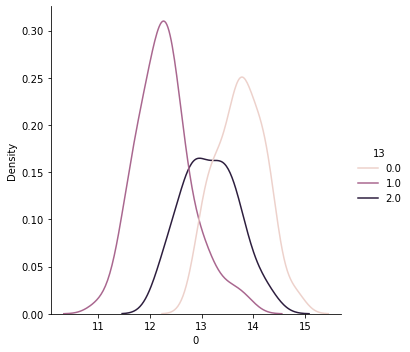

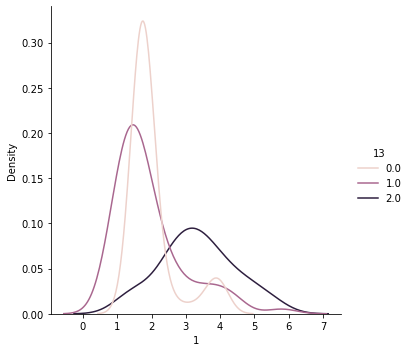

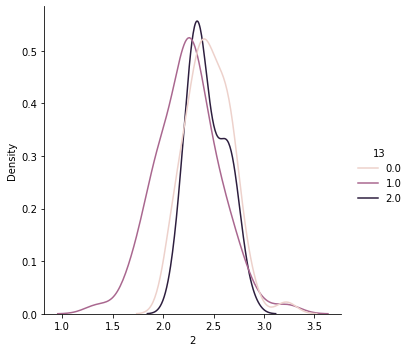

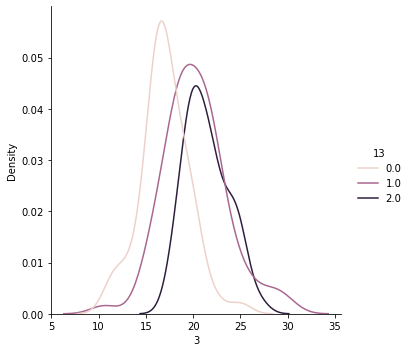

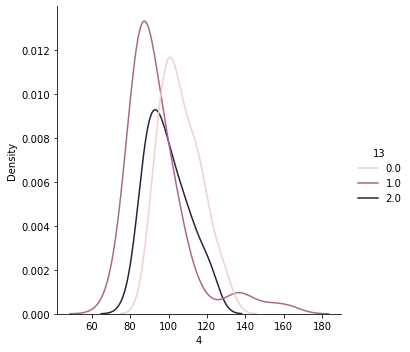

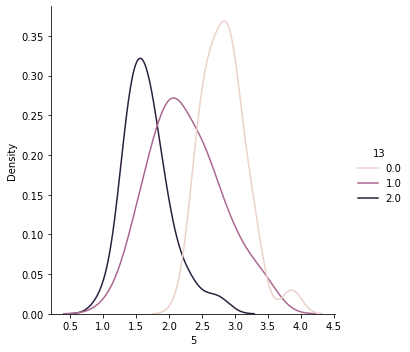

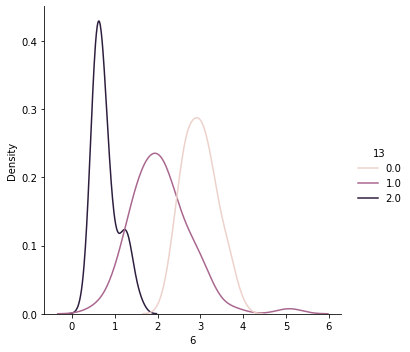

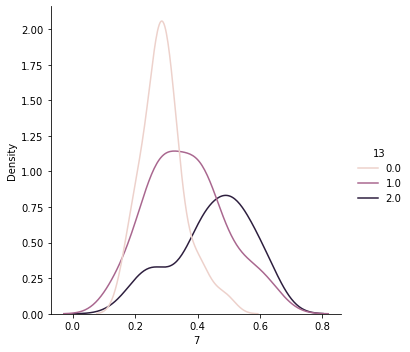

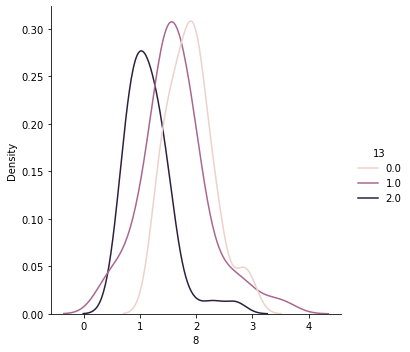

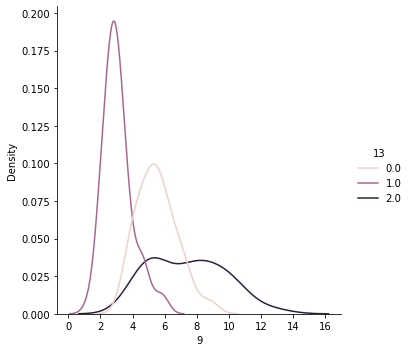

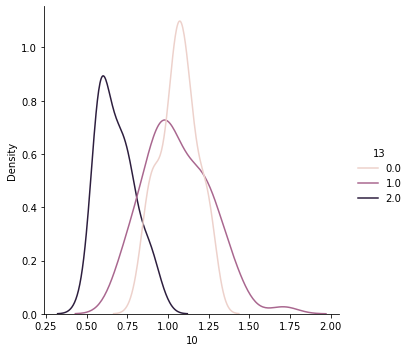

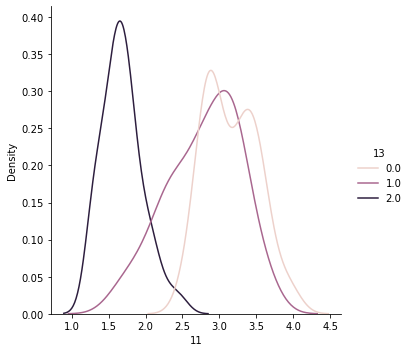

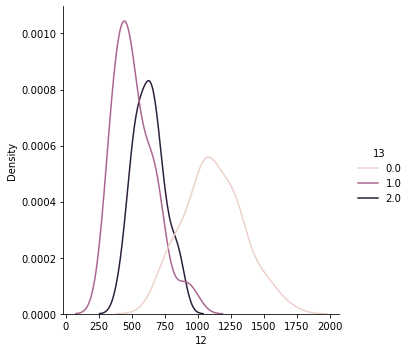

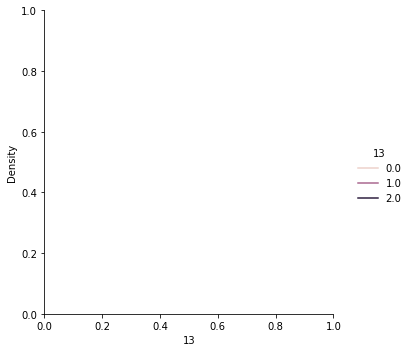

In [35]:
import pandas as pd
import numpy as np
temp = pd.DataFrame(np.hstack((X, y.reshape(-1,1))))
for i in range(len(temp.columns)-1) :
    sns.displot(x = temp.iloc[:,i], hue = temp.iloc[:,-1], data = temp, kind = 'kde')

- 소결론
  - y의 분포는 Uniform 하지 않으므로 accuracy로 판단불가능
  - FN 위음성, FP 위양성을 줄이는 것이 둘다 중요하므로 f1 score를 사용해보자.

- 모든 모델에 동일한 작업이 적용되므로 함수를 통해 코드를 재사용하자.

In [26]:
def learnAndEve(*args):
    for model in args:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f'{type(model)}를 이용한 결과')
        print(classification_report(y_test, y_pred))
        print(f1_score(y_test, y_pred, average = 'weighted'))
        print('-----------------------------------')

In [27]:
model_list = [decision_tree, random_forest,svc,sgd,lreg]
learnAndEve(*model_list)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>를 이용한 결과
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.82      1.00      0.90         9
           2       1.00      1.00      1.00         9

    accuracy                           0.94        36
   macro avg       0.94      0.96      0.95        36
weighted avg       0.95      0.94      0.95        36

0.9455882352941176
-----------------------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>를 이용한 결과
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

1.0
-----------------------------------
<class 'sklear

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 결론

- 라벨y의 분포가 불균등하므로 accuracy보다 precision, recall, 둘의 조합인 f1 score를 사용할 수 있었음
- f1_score에 weighted avg 결과 RandomFroest모델이 100%로 가장 높은 정확도를, SVC모델이 63%로 가장 낮은 정확도를 보였음
- 따라서 RandomForest 모델을 채택하기로 함

## 3. load_breast_cancer( ) 데이터 분석

### 필요한 모듈 임포트

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

## 데이터 준비

In [29]:
bc = load_breast_cancer()

In [30]:
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [31]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

- Feature Data 지정
- Label Data 지정
- Target Names 출력
- 데이터 Describe

In [32]:
#모든 열이 numeric 이므로 ndarray로 다룸
X = bc.data
y = bc.target

In [33]:
print(bc.target_names)

['malignant' 'benign']


In [34]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

## 다양한 모델로 학습하기

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [37]:
decision_tree = DecisionTreeClassifier(random_state = 2)
random_forest = RandomForestClassifier(random_state = 2)
svc = SVC(random_state = 2)
sgd = SGDClassifier(random_state = 2)
lreg = LogisticRegression(random_state = 2)

## Label의 분포를 살펴봄으로써  Unbalancedness 판단하기

In [38]:
import seaborn as sns

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

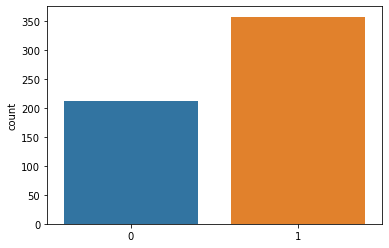

In [39]:
sns.countplot(y)

- 소결론
  - y의 분포는 Uniform 하지 않으므로 accuracy로 판단불가
  - precision과 recall중 해당 label은 FN를 줄이는 것이 더 중요하므로 recall을 metric으로 채택함

- 모든 모델에 동일한 작업이 적용되므로 함수를 통해 코드를 재사용하자.

In [40]:
def learnAndEve(*args):
    for model in args:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f'{type(model)}를 이용한 결과')
        print(classification_report(y_test, y_pred))
        # class0: 악성malignant으로, 우리가 진단하고자 하는 값의 참에 해당한다. 따라서 이 값을 기준으로 하는 recall값을 계산.
        print(recall_score(y_test, y_pred, pos_label = 0)) 
        print('-----------------------------------')

In [41]:
model_list = [decision_tree, random_forest,svc,sgd,lreg]
learnAndEve(*model_list)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>를 이용한 결과
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        45
           1       0.97      0.88      0.92        69

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

0.9555555555555556
-----------------------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>를 이용한 결과
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        45
           1       0.97      0.94      0.96        69

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

0.9555555555555556
-----------------------------------
<class 'sklearn.svm._classes.SVC'>를 이용한 결과
              precision    recall  f1-score   support

         

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 결론

- 라벨y의 분포가 균등하지 않으므로 accuracy보다 precision이나 recall값을 사용하는 편이 좋다
  - 이때, FN을 줄이는 것이 FP를 줄이는 것보다 더 중요하므로 recall을 기준으로 사용한다.
  - 또한 class0: malignant 가 True로 고려하기 위해 pos_label = 0 을 넣어주었다.
- recall_score결과 DecisionTree모델과 RandomForest모델이 96%로 가장 높은 recall을 보였으며
- f1 score를 비교해 봤을 때 RandomForest의 값이 더 높았음
- 따라서 RandomForest 모델을 채택하기로 함

# 회고

1. 어려웠던 점 : feature의 구체적인 내용을 알기 위해 DESCR을 들여봐도 어떤 내용인지 확인하기가 어려웠음. 또한 recall_score와 f1score의 경우 accuracy와 달리 기준이 되는 클래스, 혹은 평균을 지정해주어야 하는 부분이 실수하기 쉽다고 느꼈음. 그리고 데이터를 불러와서 어떤 경우에 pandas.DataFrame을 쓸지, numpy.ndarray를 쓸 지 선택하는 부분이 어려웠음.
2. 알아낸 점 : recall_score의 경우 pos_label 옵션을 통해 원하는 클래스를 지정해줄 수 있고, f1_score의 경우 average 옵션을 통해 평균을 내는 방식을 지정할 수 있었음. 또한 데이터의 종류가 단일타입일 경우 ndarray를 사용하고, 여러 타입일 경우 DataFrame을 사용해야 함을 확인했음.
3. 모호한 점 : f1_score와 recall중 어떤 값을 우선해야 할 지 판단하기 모호함
4. 시도한 내용 : 평가지표를 선택하기 위해 타겟 데이터의 balance를 시각화 하여 나타내었음. 또한 recall의 경우 적확한 class의 recall을 선택하기 위해 옵션값을 조정하였음. 그리고 recall과 precision의 우선순위가 모호한 경우에는 f1_score를 사용해 균형적인 판단을 내리기 위해 노력하였음.
5. 다짐 : 한번 본 코드를 남의 코드가 아닌 나의 코드가 될 수 있게끔 녹여내자고 생각함. 꾸준함만이 빙산을 녹일 수 있음.

# 😎끝.